In [3]:
import pandas as pd
df=pd.read_csv('D:\Maths\spread_locator_dataset.csv')
df

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\adity\AppData\Local\Temp\ipykernel_12464\3790304708.py:2: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv('D:\Maths\spread_locator_dataset.csv')


,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,26-01-2023,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,28-01-2023,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,28-01-2023,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,18-01-2023,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,04-01-2023,4,North,Success
...,...,...,...,...,...,...,...
215,10c2a8f2-89d0-485c-bf8f-9508d32a02fc,CUST5563,4356.76,12-01-2023,2,South,Fail
216,5618814b-f7e2-424d-9617-9fc8d8643370,CUST8579,2025.53,29-01-2023,6,South,Fail
217,5636c9e7-9d54-4654-9c89-fdf31be87d96,CUST5092,2648.08,30-01-2023,1,West,Fail
218,6ba09450-a455-4983-bbad-3dad292cc839,CUST2235,2338.62,26-01-2023,3,North,Success


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import bernoulli, binom, poisson, lognorm, powerlaw, boxcox, norm
import statsmodels.api as sm

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

C:\Users\adity\AppData\Local\Temp\ipykernel_12464\1831431620.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [6]:
amounts = df['transaction_amount']

mean_amt = amounts.mean()
std_amt = amounts.std()

z_5000 = (5000 - mean_amt) / std_amt
prob_exceed_5000 = 1 - norm.cdf(z_5000)

print("Z-score for ₹5000:", z_5000)
print("Probability Amount > ₹5000:", prob_exceed_5000)

Z-score for ₹5000: 0.8232880785671723
Probability Amount > ₹5000: 0.20517209567554384


In [17]:
df['transaction_occurred'] = df['transaction_status'].apply(lambda x: 1 if x == 'Success' else 0)

p_hat = df['transaction_occurred'].mean()
print("Bernoulli Probability (p):", p_hat)
weekly_counts = df.groupby(df['transaction_date'].dt.to_period('W'))['transaction_occurred'].sum()
n = weekly_counts.max()
p = weekly_counts.mean() / n

print("Binomial n:", n, "p:", p)

Bernoulli Probability (p): 0.44545454545454544
Binomial n: 23 p: 0.7101449275362318


Box-Cox Lambda: -0.18123612911845818


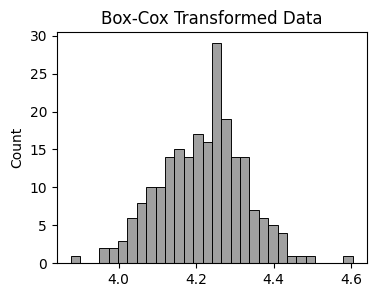

In [43]:
amounts_positive = amounts + 1 
boxcox_transformed, lambda_bc = boxcox(amounts_positive)

print("Box-Cox Lambda:", lambda_bc)
plt.figure(figsize=(4,3))
sns.histplot(boxcox_transformed, bins=30, color='grey')
plt.title("Box-Cox Transformed Data")
plt.show()

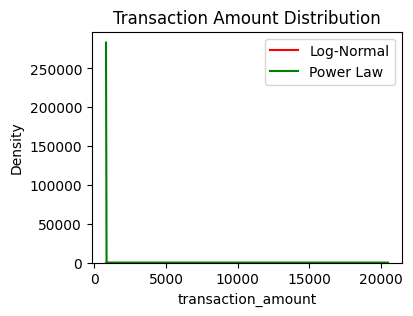

In [28]:
amounts = df['transaction_amount']

shape, loc, scale = lognorm.fit(amounts, floc=0)
a, loc_p, scale_p = powerlaw.fit(amounts)

plt.figure(figsize=(4, 3))
sns.histplot(amounts, bins=30, stat="density")
x_vals = np.linspace(amounts.min(), amounts.max(), 500)
plt.plot(x_vals, lognorm.pdf(x_vals, shape, loc, scale), label="Log-Normal", color='red')
plt.plot(x_vals, powerlaw.pdf(x_vals, a, loc_p, scale_p), label="Power Law", color='green')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

<Figure size 100x100 with 0 Axes>

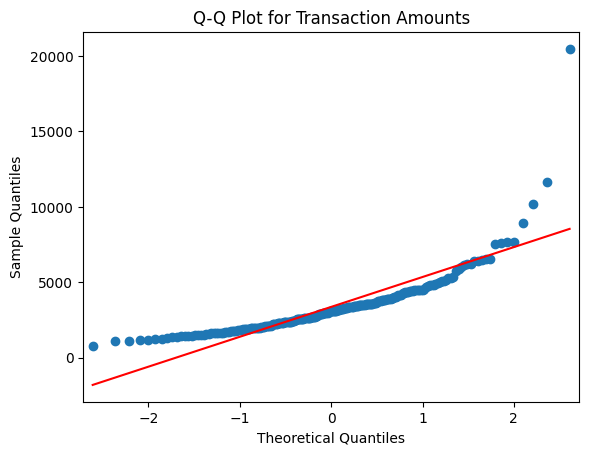

In [32]:
plt.figure(figsize=(1,1))
sm.qqplot(amounts, line='s')
plt.title("Q-Q Plot for Transaction Amounts")
plt.show()

Poisson Lambda: 20.258064516129032


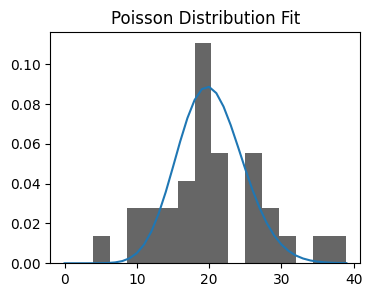

In [42]:
daily_counts = df.groupby('transaction_date')['transaction_count'].sum()
lambda_hat = daily_counts.mean()

print("Poisson Lambda:", lambda_hat)
x = np.arange(0, daily_counts.max()+1)
plt.figure(figsize=(4, 3))
plt.hist(daily_counts, bins=15, density=True, alpha=0.6, color='black')
plt.plot(x, poisson.pmf(x, lambda_hat))
plt.title("Poisson Distribution Fit")
plt.show()